<a href="https://colab.research.google.com/github/Esmail97/ds_projects/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  # For classification
from sklearn.ensemble import GradientBoostingClassifier  # For classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score ,accuracy_score ,f1_score # For classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##Explore data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.duplicated().sum()

0

##Data Visualization

<Axes: >

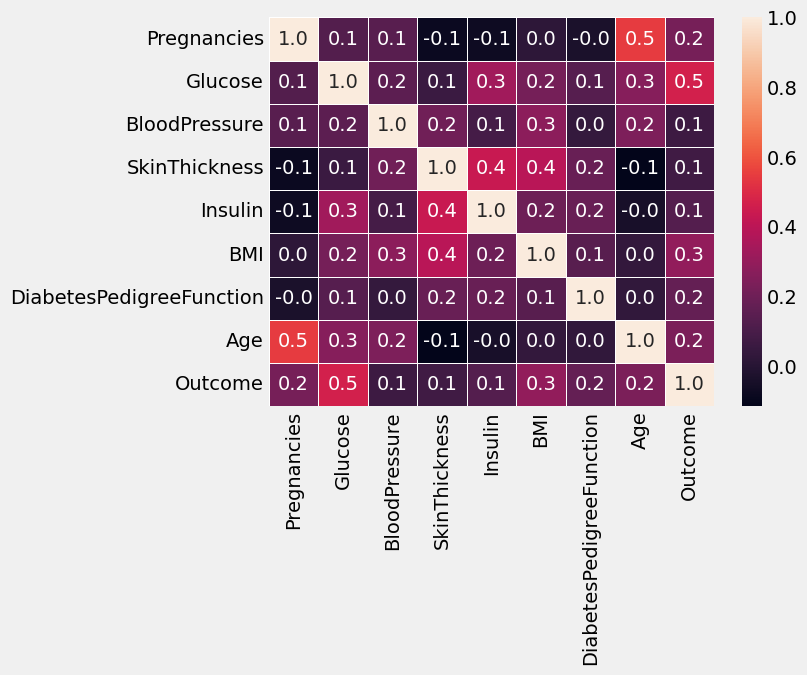

In [7]:
cor = data.corr()
sns.heatmap(cor,annot=True,fmt='.1f',linewidths=.5)

<Axes: ylabel='Outcome'>

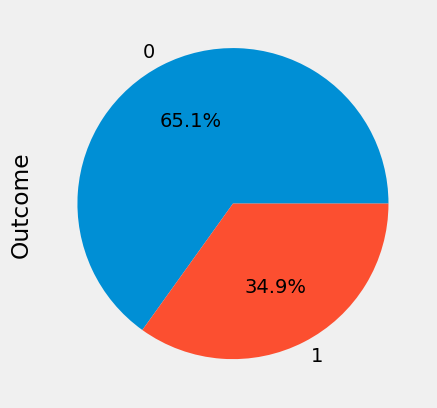

In [8]:
data.Outcome.value_counts().plot.pie(autopct = '%0.1f%%')

<Axes: xlabel='Age', ylabel='Count'>

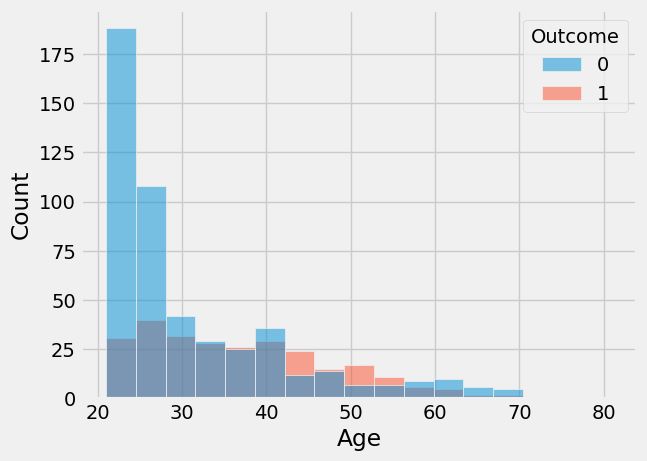

In [9]:
sns.histplot(data,x=data.Age,hue='Outcome')

<Axes: xlabel='Outcome', ylabel='count'>

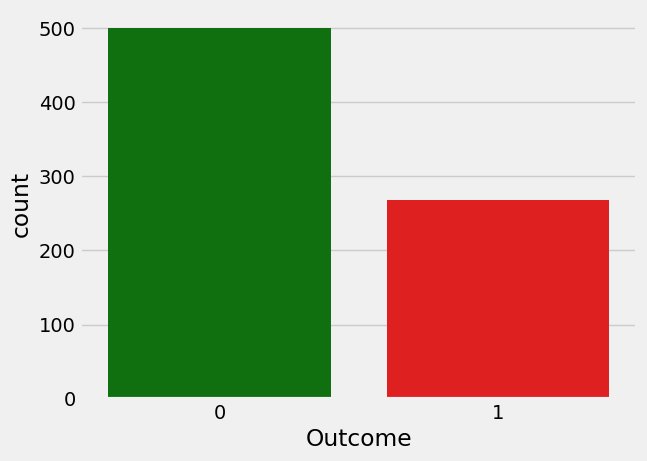

In [10]:
sns.countplot(data,x='Outcome',palette=['g','r'])

<Axes: title={'center': 'Box Plot'}, ylabel='Pregnancies'>

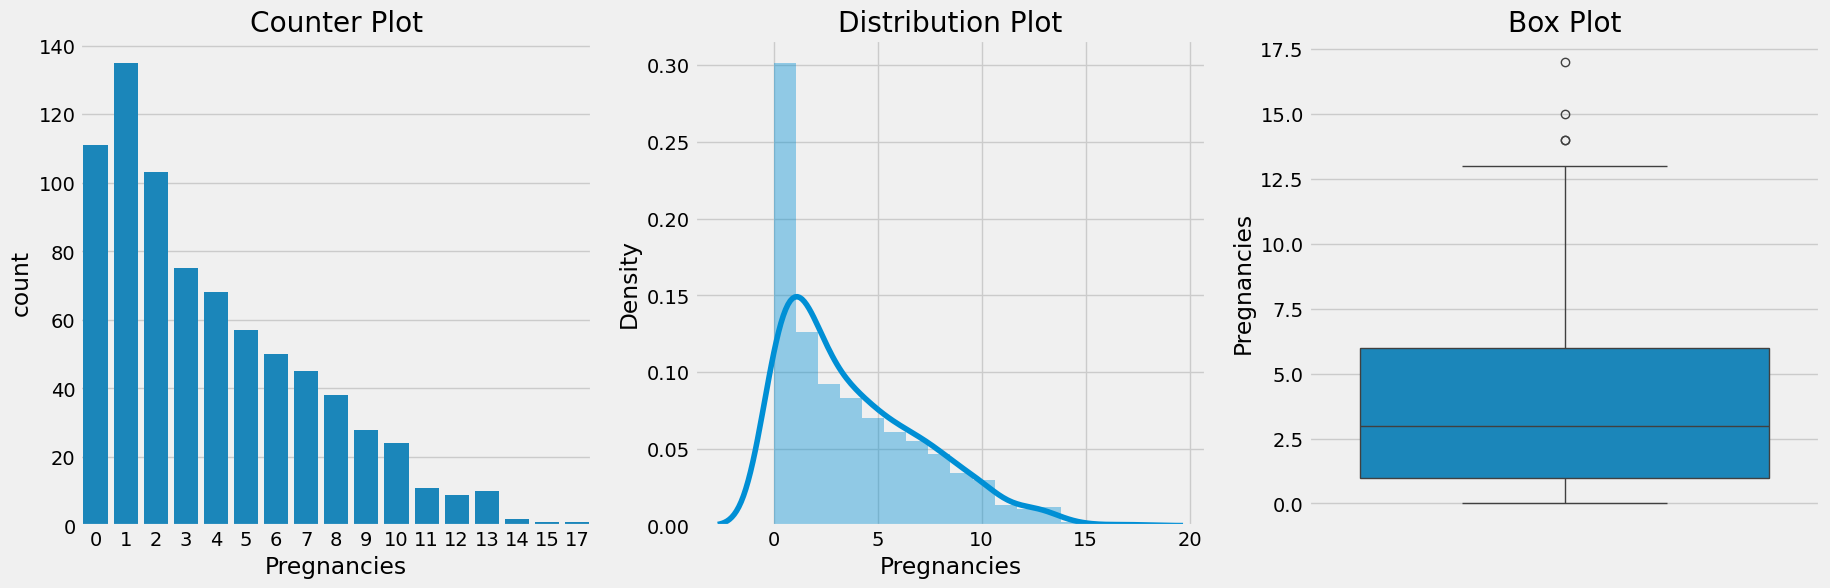

In [11]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Counter Plot')
sns.countplot(data,x='Pregnancies')

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(data['Pregnancies'])

plt.subplot(1,3,3)
plt.title('Box Plot')
sns.boxplot(data['Pregnancies'])

<Axes: xlabel='Age'>

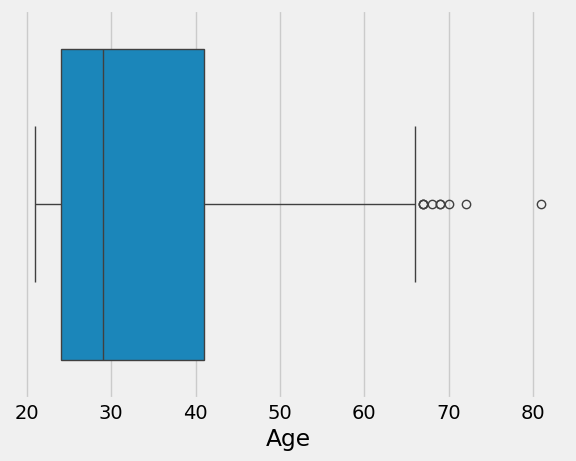

In [12]:
sns.boxplot(data,x=data.Age)

In [13]:
#split data
X = data.drop(['Outcome'],axis = 1)
y = data.Outcome

In [14]:
X_train , X_test , y_train ,y_test = train_test_split(X , y , test_size=0.2,random_state=42)

In [15]:
models = ['LogisticRegression','RandomForestClassifier',
          'GradientBoostingClassifier','SVC(linear)','SVC(polynomial)','SVC(sigmoid)']
result_1 = []
result_2 = []
result_3 = []

In [16]:
def select_model(model):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_pred,y_test)
  recall = recall_score(y_pred,y_test)
  f1 = f1_score(y_pred,y_test)
  result_1.append(accuracy)
  result_2.append(recall)
  result_3.append(f1)
  sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)
  print ('Accuracy Score: ',accuracy)
  print ('Recall Score: ',recall)
  print ('F1 Score: ',f1)


Accuracy Score:  0.7467532467532467
Recall Score:  0.6379310344827587
F1 Score:  0.6548672566371682


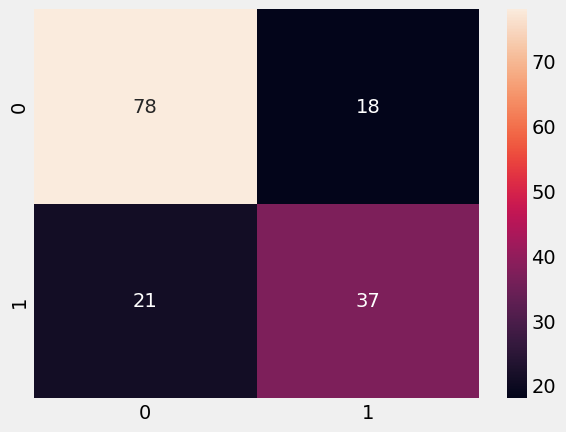

In [17]:
model_1 = LogisticRegression()
select_model(model_1)

Accuracy Score:  0.7337662337662337
Recall Score:  0.6206896551724138
F1 Score:  0.6371681415929203


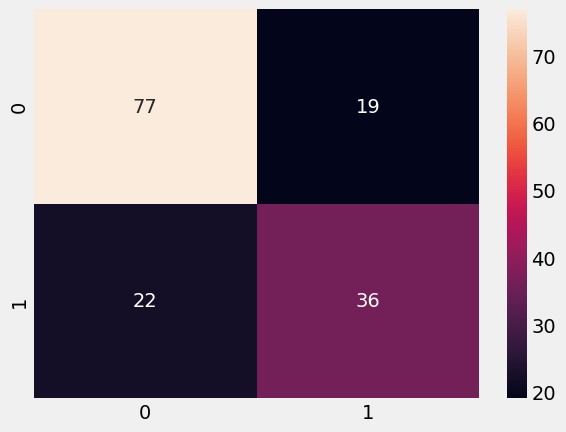

In [18]:
model_2 = RandomForestClassifier()
select_model(model_2)

Accuracy Score:  0.7402597402597403
Recall Score:  0.6271186440677966
F1 Score:  0.6491228070175439


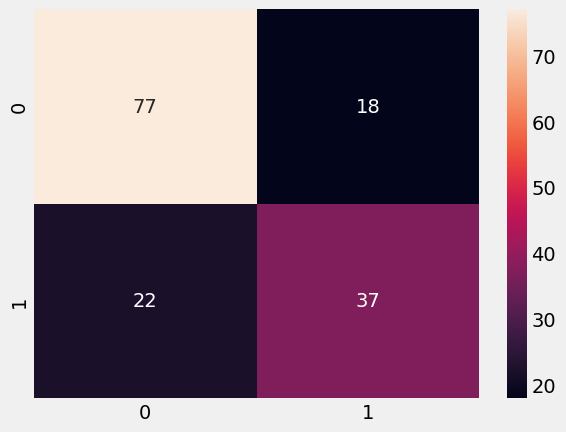

In [19]:
model_3 = GradientBoostingClassifier()
select_model(model_3)

Accuracy Score:  0.7532467532467533
Recall Score:  0.6545454545454545
F1 Score:  0.6545454545454545


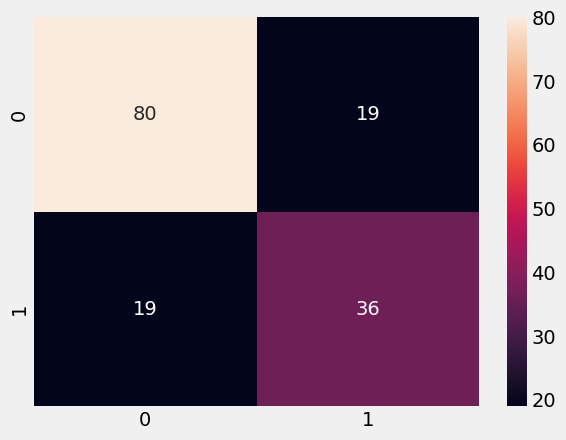

In [20]:
model_4 = SVC(kernel='linear')
select_model(model_4)

Accuracy Score:  0.7597402597402597
Recall Score:  0.7142857142857143
F1 Score:  0.6185567010309277


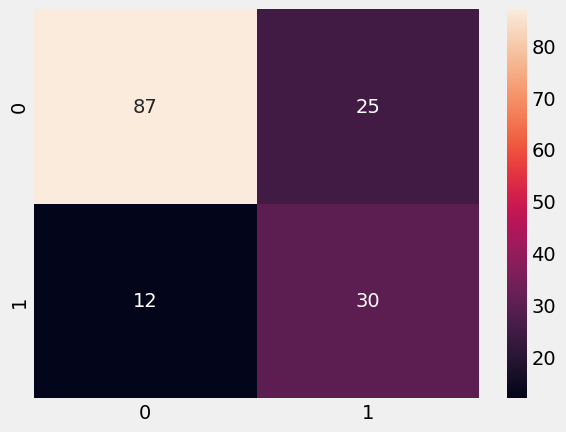

In [21]:
model_5 = SVC(kernel='poly')
select_model(model_5)

Accuracy Score:  0.551948051948052
Recall Score:  0.28125
F1 Score:  0.20689655172413793


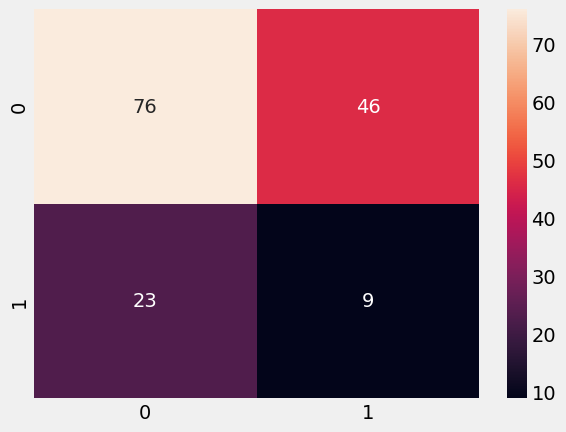

In [22]:
model_6 = SVC(kernel='sigmoid')
select_model(model_6)


In [23]:
result_1

[0.7467532467532467,
 0.7337662337662337,
 0.7402597402597403,
 0.7532467532467533,
 0.7597402597402597,
 0.551948051948052]

In [25]:
finalResult = pd.DataFrame({'Model':models , 'Accuracy':result_1,'Recall':result_2,'FScore':result_3})

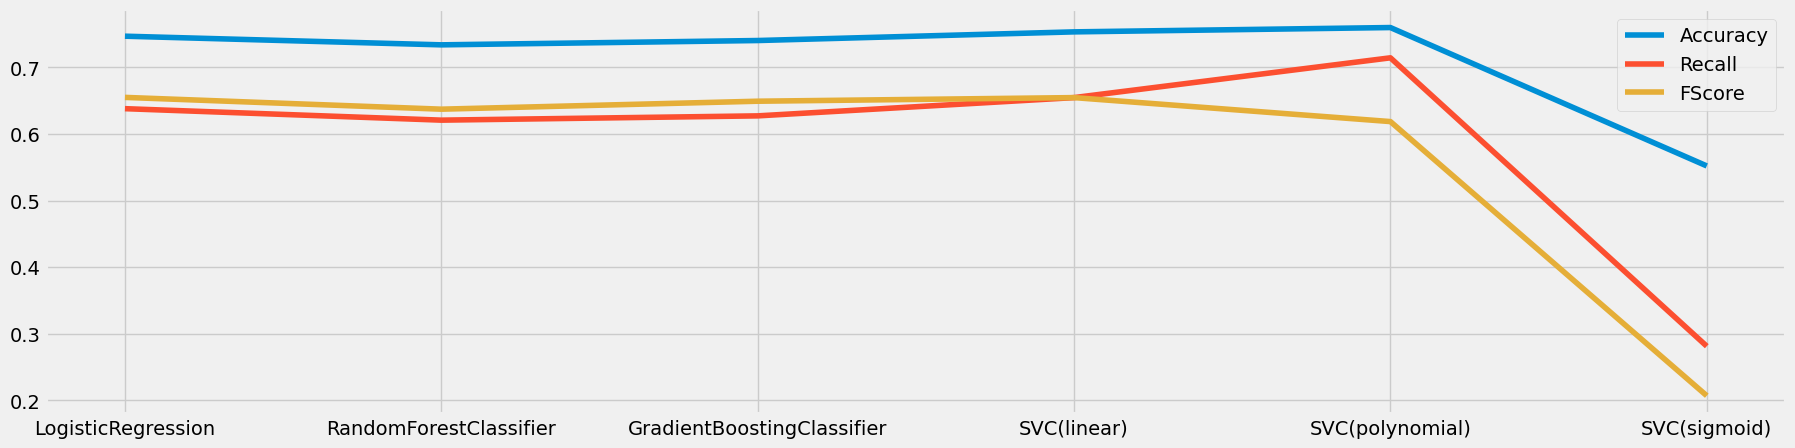

In [29]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot(finalResult.Model,result_1,label='Accuracy')
plt.plot(finalResult.Model,result_2,label='Recall')
plt.plot(finalResult.Model,result_3,label='FScore')
plt.legend()
plt.show()